In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sales = pd.read_csv('../data/sales_train_validation.csv')
calendar = pd.read_csv('../data/calendar.csv')
prices = pd.read_csv('../data/sell_prices.csv')

print("Sales shape:", sales.shape)
print("Calendar shape:", calendar.shape)
print("Prices shape:", prices.shape)

Sales shape: (30490, 1919)
Calendar shape: (1969, 14)
Prices shape: (6841121, 4)


In [2]:
print("=== SALES ===")
print(sales.head())
print("\n=== CALENDAR ===")
print(calendar.head())
print("\n=== PRICES ===")
print(prices.head())

=== SALES ===
                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  d_1907  d_1908  \
0       CA    0    0    0    0  ...       1       3       0       1       1   
1       CA    0    0    0    0  ...       0       0       0       0       0   
2       CA    0    0    0    0  ...       2       1       2       1       1   
3       CA    0    0    0    0  ...       1       0       5       4       1   
4       CA    0    0    0    0  ...       2       1       1       0       1   

   d_1909  d_1910  d_1911  d_1

In [3]:
print("=== CALENDAR ===")
print(calendar.head(10))
print("\n=== MISSING VALUES ===")
print("Sales nulls:", sales.isnull().sum().sum())
print("Calendar nulls:", calendar.isnull().sum().sum())
print("Prices nulls:", prices.isnull().sum().sum())

print("\n=== SALES COLUMNS (first 10) ===")
print(sales.columns[:10].tolist())

=== CALENDAR ===
         date  wm_yr_wk    weekday  wday  month  year     d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011   d_1          NaN   
1  2011-01-30     11101     Sunday     2      1  2011   d_2          NaN   
2  2011-01-31     11101     Monday     3      1  2011   d_3          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011   d_4          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011   d_5          NaN   
5  2011-02-03     11101   Thursday     6      2  2011   d_6          NaN   
6  2011-02-04     11101     Friday     7      2  2011   d_7          NaN   
7  2011-02-05     11102   Saturday     1      2  2011   d_8          NaN   
8  2011-02-06     11102     Sunday     2      2  2011   d_9    SuperBowl   
9  2011-02-07     11102     Monday     3      2  2011  d_10          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1     

In [4]:
# Melt sales from wide to long format
sales_long = sales.melt(
    id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
    var_name='d',
    value_name='sales'
)

print("Shape after melt:", sales_long.shape)
print("\nFirst few rows:")
print(sales_long.head(10))

Shape after melt: (58327370, 8)

First few rows:
                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   
5  HOBBIES_1_006_CA_1_validation  HOBBIES_1_006  HOBBIES_1  HOBBIES     CA_1   
6  HOBBIES_1_007_CA_1_validation  HOBBIES_1_007  HOBBIES_1  HOBBIES     CA_1   
7  HOBBIES_1_008_CA_1_validation  HOBBIES_1_008  HOBBIES_1  HOBBIES     CA_1   
8  HOBBIES_1_009_CA_1_validation  HOBBIES_1_009  HOBBIES_1  HOBBIES     CA_1   
9  HOBBIES_1_010_CA_1_validation  HOBBIES_1_010  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  sales  
0       CA  d_1      0  
1       CA  d_1     

In [5]:
# Merge with calendar to get real dates
sales_long = sales_long.merge(
    calendar[['d', 'date', 'wm_yr_wk']],
    on='d',
    how='left'
)

# Convert date column to datetime format
sales_long['date'] = pd.to_datetime(sales_long['date'])

print("Shape after calendar merge:", sales_long.shape)
print("\nFirst few rows:")
print(sales_long[['id', 'item_id', 'store_id', 'd', 'date', 'sales']].head(10))

Shape after calendar merge: (58327370, 10)

First few rows:
                              id        item_id store_id    d       date  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001     CA_1  d_1 2011-01-29   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002     CA_1  d_1 2011-01-29   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003     CA_1  d_1 2011-01-29   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004     CA_1  d_1 2011-01-29   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005     CA_1  d_1 2011-01-29   
5  HOBBIES_1_006_CA_1_validation  HOBBIES_1_006     CA_1  d_1 2011-01-29   
6  HOBBIES_1_007_CA_1_validation  HOBBIES_1_007     CA_1  d_1 2011-01-29   
7  HOBBIES_1_008_CA_1_validation  HOBBIES_1_008     CA_1  d_1 2011-01-29   
8  HOBBIES_1_009_CA_1_validation  HOBBIES_1_009     CA_1  d_1 2011-01-29   
9  HOBBIES_1_010_CA_1_validation  HOBBIES_1_010     CA_1  d_1 2011-01-29   

   sales  
0      0  
1      0  
2      0  
3      0  
4      0  
5      0  
6      0  
7     12  
8   

In [6]:
# Merge with prices
sales_long = sales_long.merge(
    prices,
    on=['store_id', 'item_id', 'wm_yr_wk'],
    how='left'
)

print("Shape after price merge:", sales_long.shape)
print("\nFirst few rows:")
print(sales_long[['item_id', 'store_id', 'date', 'sales', 'sell_price']].head(10))

# Check how many rows have no price (early days before item existed)
print("\nRows with no price:", sales_long['sell_price'].isnull().sum())

Shape after price merge: (58327370, 11)

First few rows:
         item_id store_id       date  sales  sell_price
0  HOBBIES_1_001     CA_1 2011-01-29      0         NaN
1  HOBBIES_1_002     CA_1 2011-01-29      0         NaN
2  HOBBIES_1_003     CA_1 2011-01-29      0         NaN
3  HOBBIES_1_004     CA_1 2011-01-29      0         NaN
4  HOBBIES_1_005     CA_1 2011-01-29      0         NaN
5  HOBBIES_1_006     CA_1 2011-01-29      0         NaN
6  HOBBIES_1_007     CA_1 2011-01-29      0         NaN
7  HOBBIES_1_008     CA_1 2011-01-29     12        0.46
8  HOBBIES_1_009     CA_1 2011-01-29      2        1.56
9  HOBBIES_1_010     CA_1 2011-01-29      0        3.17

Rows with no price: 12299413


In [7]:
# Filter out rows where product had no price (not yet in stores)
sales_clean = sales_long[sales_long['sell_price'].notna()].copy()

print("Shape after filtering:", sales_clean.shape)
print("\nDate range:", sales_clean['date'].min(), "to", sales_clean['date'].max())
print("Unique products:", sales_clean['item_id'].nunique())
print("Unique stores:", sales_clean['store_id'].nunique())

# Save to a parquet file (faster and smaller than CSV for large data)
sales_clean.to_parquet('../data/sales_clean.parquet', index=False)
print("\nData saved successfully!")

Shape after filtering: (46027957, 11)

Date range: 2011-01-29 00:00:00 to 2016-04-24 00:00:00
Unique products: 3049
Unique stores: 10

Data saved successfully!


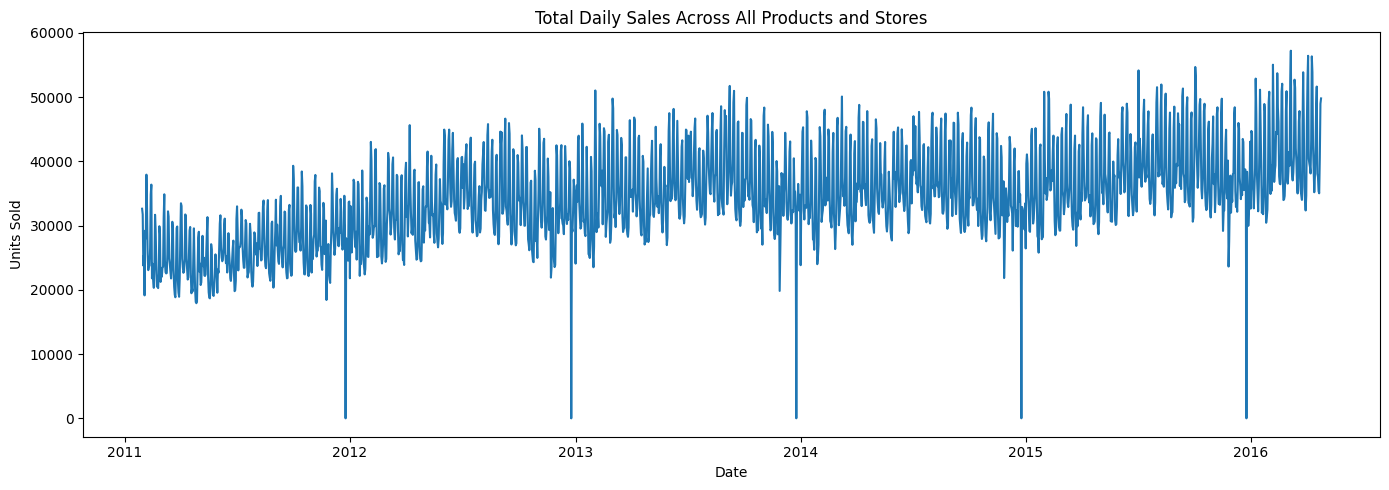

In [8]:
# Aggregate total sales across all products and stores by day
daily_sales = sales_clean.groupby('date')['sales'].sum().reset_index()

plt.figure(figsize=(14, 5))
plt.plot(daily_sales['date'], daily_sales['sales'])
plt.title('Total Daily Sales Across All Products and Stores')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd

sales_clean = pd.read_parquet('../data/sales_clean.parquet')
print("Data loaded!")

Data loaded!


In [2]:
print("Unique store IDs:", sorted(sales_clean['store_id'].unique()))
print("Unique state IDs:", sorted(sales_clean['state_id'].unique()))
print("Unique categories:", sorted(sales_clean['cat_id'].unique()))
print("Unique departments:", sorted(sales_clean['dept_id'].unique()))

Unique store IDs: ['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']
Unique state IDs: ['CA', 'TX', 'WI']
Unique categories: ['FOODS', 'HOBBIES', 'HOUSEHOLD']
Unique departments: ['FOODS_1', 'FOODS_2', 'FOODS_3', 'HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2']
